## Breakthrough Listen: Voyager 1 Observations

[Voyager 1](https://en.wikipedia.org/wiki/Voyager_1) is the most distant man-made object from Earth. Launched by NASA in 1977, it has travelled at fantastic speed (roughly 17,000 m/s), past the outer boundaries of our Solar System and into interstellar space (>12.5 billion miles from the Sun).

Remarkably, 38 years on, Voyager 1 is still sending telemetry data from the depths of interstellar space. This makes it a great systems test for the Breakthrough Listen signal processing pipeline.

In this tutorial, we load, read, and plot some Breakthrough Listen (BL) observations of Voyager 1. The data were taken using the [Robert C. Byrd Greenbank Telescope](https://science.nrao.edu/facilities/gbt) in West Virginia.

### About this tutorial

This tutorial introduces you to BL filterbank data. It is intended for intermediate to advanced users, who have experience with Python, Numpy and basic astronomy. You'll need to have a scientific Python 2 installation (numpy, scipy, matplotlib, and [astropy](http://www.astropy.org)) and have [Jupyter](http://www.jupyter.org) and [Breakthrough Listen I/O Methods for Python](https://github.com/UCBerkeleySETI/blimpy) installed.


### About the data

We used the Greenbank X-band receiver (8.0-11.6 GHz) on December 30, 2015, to observe the known position of Voyager 1. The BL digital signal processing system saves digitized data in a 'raw' format, which we have converted into 'filterbank' format using our `gpuspec` code (see guppi2spectra.c in https://github.com/UCBerkeleySETI/gbt_seti/tree/master/src ). For *advanced users* who want to start from scratch, the specific command is:

```
time /gbt_seti/bin/gpuspec -i ./blc3_2bit_guppi_57386_VOYAGER1_0004.0000.raw \
    -B 2 -f 1032192 -t 15 -V -o /datax2/scratch/dprice/
```

For the purposes of this tutorial, we suggest that you download the 504 MB file [`voyager_f1032192_t300_v2.fil`](https://storage.googleapis.com/gbt_fil/voyager_f1032192_t300_v2.fil) from the BL data archive.

#### Filterbank format 

The voyager data is stored in *filterbank format*, a simple binary file format that is detailed in the [SIGPROC user guide](http://sigproc.sourceforge.net/sigproc.pdf). For this tutorial, we've provided a simple Python class to load and interpret the filterbank file into a [numpy](http://www.numpy.org) array. 

## Let's get started!

Firstly, let's setup the notebook and import the `Waterfall()` class to read the data.

In [1]:
%matplotlib inline

In [3]:
import pylab as plt
from blimpy import Waterfall

Now, let's read the observation data using `Waterfall()`:

In [4]:
obs = Waterfall('voyager_f1032192_t300_v2.fil')

We can get basic info about the file by reading the filterbank header. The `info()` method will do this:

In [5]:
obs.info()

    telescope_id :                                6
           nbits :                               32
     source_name :                         VOYAGER1
       data_type :                                1
            foff :               -2.83831641788e-06
           ibeam :                                1
          nchans :                         66060288
           tsamp :                      105.6964608
     rawdatafile : ./blc3_2bit_guppi_57386_VOYAGER1_0004.0000.raw
        az_start :                              0.0
         src_raj :                     17:11:58.728
         src_dej :                      11:56:57.48
          tstart :                    57386.8649074
          nbeams :                                1
            fch1 :                    8588.96484233
        za_start :                              0.0
      machine_id :                               20
            nifs :                                1


The specifics are discussed in the detailed in the [SIGPROC user guide](http://sigproc.sourceforge.net/sigproc.pdf). Briefly, astronomers use a Celestial coordinate system to specify the location of objects in outer space. The `src_raj` and `src_dej` specify the [J2000](https://en.wikipedia.org/wiki/Epoch_%28astronomy%29#Julian_years_and_J2000) coordinates, in terms of Right Ascension and Declination (RA & DEC), toward which the telescope is pointing. `tstart` specifies the [Julian Date](https://en.wikipedia.org/wiki/Julian_day) of the observation, and `fch1` and `foff` specify the frequency of the first and frequency increment of each data channel respectively, in MHz. 


We can also look directly at the header and data, which are stored as objects in the `Filterbank()` class:

In [6]:
print obs.header
print obs.data.shape

{'telescope_id': 6, 'nbits': 32, 'source_name': 'VOYAGER1', 'data_type': 1, 'foff': -2.838316417875744e-06, 'ibeam': 1, 'nchans': 66060288, 'tsamp': 105.6964608, 'rawdatafile': './blc3_2bit_guppi_57386_VOYAGER1_0004.0000.raw', 'az_start': 0.0, 'src_raj': <Angle 17.199646666666666 hourangle>, 'src_dej': <Angle 11.9493 deg>, 'tstart': 57386.864907407406, 'nbeams': 1, 'fch1': 8588.964842330843, 'za_start': 0.0, 'machine_id': 20, 'nifs': 1}
(2, 66060288)


The data has the shape (2, 66060288), meaning that is has 2 time integrations, and  66,060,288 channels, over a bandwidth of 187 MHz. For the record, that's a lot of channels! The corresponding channel bandwidth is far more than that required for most astrophysical observations.

### Plotting the data

The `Filterbank()` class provides a `plot_spectrum()` function to plot the data:

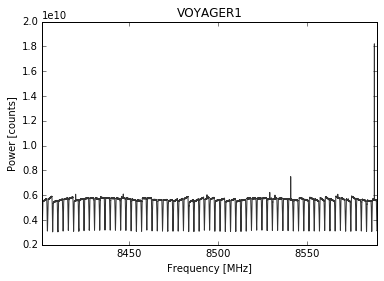

In [7]:
obs.plot_spectrum()

What we see here is the power spectral density (or simply "spectrum") of the data contained in the filterbank file. Apparent in the plot are discontinuities due to the BL digital filters, but not a lot else. Voyager is a very narrowband signal, so we can't easily see it in this plot. However, if we zoom in on where Voyager's telemetry is known to be, we see some very narrowband signals:

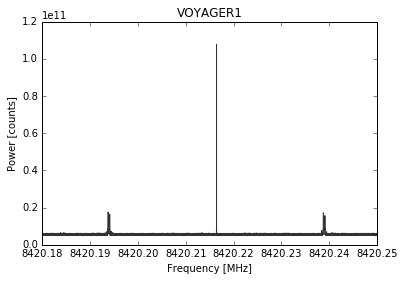

In [8]:
obs.plot_spectrum(f_start=8420.18, f_stop=8420.25)

This is it: the telemetry signal from Voyager 1! What you see is the carrier (center) and two sidebands that carry the data. We can zoom in on these to see more features:

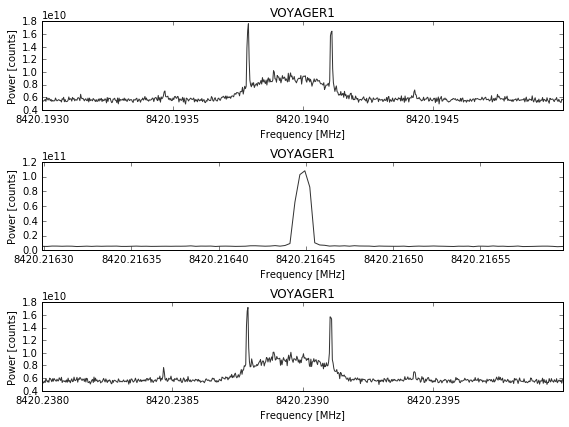

In [9]:
plt.figure(figsize=(8, 6))
plt.subplot(3,1,1)
obs.plot_spectrum(f_start=8420.193, f_stop=8420.195) # left sideband
plt.subplot(3,1,2)
obs.plot_spectrum(f_start=8420.2163, f_stop=8420.2166) # carrier
plt.subplot(3,1,3)
obs.plot_spectrum(f_start=8420.238, f_stop=8420.24) # right sideband
plt.tight_layout()

### Discussion

If you've gotten this far, taken a moment to pause and reflect. This faint signal has travelled billions of miles through space, back to us here on Earth. Launching this probe out of the Solar System was an immense feat, and the fact that we can detect it still, almost 40 years after its launch, is even more impressive.

The signals from probes such as Voyager are very different from the signals we measure from astrophysical objects. This is one of the approaches Breakthrough Listen is using in its approach toward detecting extraterrestrial signals.

We hope this tutorial has given you a glimpse into BL observations and data products. The next step, which will come in a later tutorial, is to calibrate these data into a more sensible unit, and to compensate for the Earth's rotation and the recessional velocity of Voyager. 